In [9]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5219858734080226235
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1292926252917017191
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [10]:
 !unzip archive.zip

Archive:  archive.zip
replace test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [12]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [13]:
TRAIN_DIR = "/content/train"
TEST_DIR = "/content/test"
BATCH_SIZE = 64


In [14]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 4830 in folder sad
For training data, found 436 in folder disgust
For training data, found 7215 in folder happy
For training data, found 3995 in folder angry
For training data, found 4097 in folder fear
For training data, found 4965 in folder neutral
For training data, found 3171 in folder surprise


In [15]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 1247 in folder sad
For testing data, found 111 in folder disgust
For testing data, found 1774 in folder happy
For testing data, found 958 in folder angry
For testing data, found 1024 in folder fear
For testing data, found 1233 in folder neutral
For testing data, found 831 in folder surprise


In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (48, 48),
                                                 batch_size = BATCH_SIZE,
                                                 color_mode="grayscale",
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (48, 48),
                                            batch_size = BATCH_SIZE,
                                            color_mode="grayscale",
                                            class_mode = 'categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [18]:
test_set

In [19]:
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten

In [20]:
# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [21]:

emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [22]:
from tensorflow.python.keras.optimizers import *

In [23]:
from tensorflow.keras.optimizers import Adam

In [24]:
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

In [26]:
# Train the neural network/model
emotion_model_info = emotion_model.fit(
        training_set,
        steps_per_epoch=28709 // BATCH_SIZE,
        epochs=100,
        validation_data=test_set,
        validation_steps= 7178 // BATCH_SIZE)

Epoch 1/100
448/448 [==============================] - 18s 41ms/step - loss: 1.8024 - accuracy: 0.2560 - val_loss: 1.7304 - val_accuracy: 0.3224
Epoch 2/100
448/448 [==============================] - 18s 40ms/step - loss: 1.6700 - accuracy: 0.3411 - val_loss: 1.5868 - val_accuracy: 0.3863
Epoch 3/100
448/448 [==============================] - 18s 40ms/step - loss: 1.6014 - accuracy: 0.3777 - val_loss: 1.5196 - val_accuracy: 0.4213
Epoch 4/100
448/448 [==============================] - 18s 40ms/step - loss: 1.5479 - accuracy: 0.4010 - val_loss: 1.4526 - val_accuracy: 0.4396
Epoch 5/100
448/448 [==============================] - 18s 40ms/step - loss: 1.5054 - accuracy: 0.4236 - val_loss: 1.4106 - val_accuracy: 0.4587
Epoch 6/100
448/448 [==============================] - 18s 40ms/step - loss: 1.4626 - accuracy: 0.4407 - val_loss: 1.3671 - val_accuracy: 0.4787
Epoch 7/100
448/448 [==============================] - 18s 40ms/step - loss: 1.4227 - accuracy: 0.4527 - val_loss: 1.3316 - val_ac

In [27]:
train_loss,train_accu = emotion_model.evaluate(training_set)
test_loss, test_accu = emotion_model.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

113/113 [==============================] - 2s 16ms/step - loss: 0.9880 - accuracy: 0.6580
final train accuracy = 85.76 , validation accuracy = 65.80


In [30]:
import matplotlib.pyplot as plt

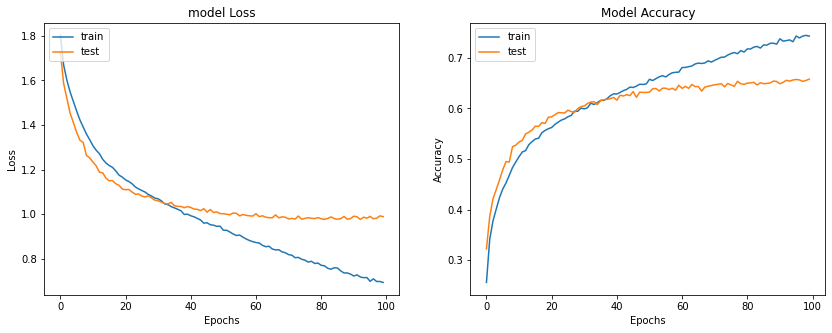

In [31]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
# save model structure in jason file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')

In [33]:
import cv2
import numpy as np
from keras.models import model_from_json


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("emotion_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [34]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


-----------------------------------------------------------------
[[124   6 108 256 210 159  95]
 [ 11   1  14  31  22  21  11]
 [144  11 123 258 214 146 128]
 [251  25 226 422 338 304 208]
 [177   9 135 330 257 179 146]
 [163  13 139 310 254 215 153]
 [118   8 108 201 169 123 104]]


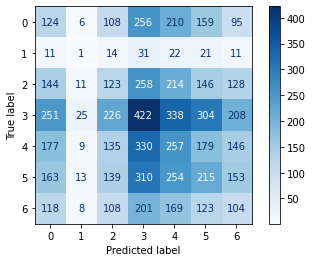

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.13      0.13      0.13       958
           1       0.01      0.01      0.01       111
           2       0.14      0.12      0.13      1024
           3       0.23      0.24      0.24      1774
           4       0.18      0.21      0.19      1233
           5       0.19      0.17      0.18      1247
           6       0.12      0.13      0.12       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



In [35]:

# do prediction on test data
predictions = emotion_model.predict_generator(test_set)

# see predictions
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_set.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_set.classes, predictions.argmax(axis=1)))